In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
!pip install catboost
from catboost import CatBoostRegressor,Pool
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Load datasets
train = pd.read_csv('/content/train_v9rqX0R.csv')
test = pd.read_csv('/content/test_AbJTz2l.csv')
ss = pd.read_csv('/content/sample_submission_8RXa3c6.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int64  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5328 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  running                    5681 non-null   int64  
 12  price/wt                   5681 non-null   float64
 13  Item_MRP2                  5681 non-null   objec

In [ ]:
train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

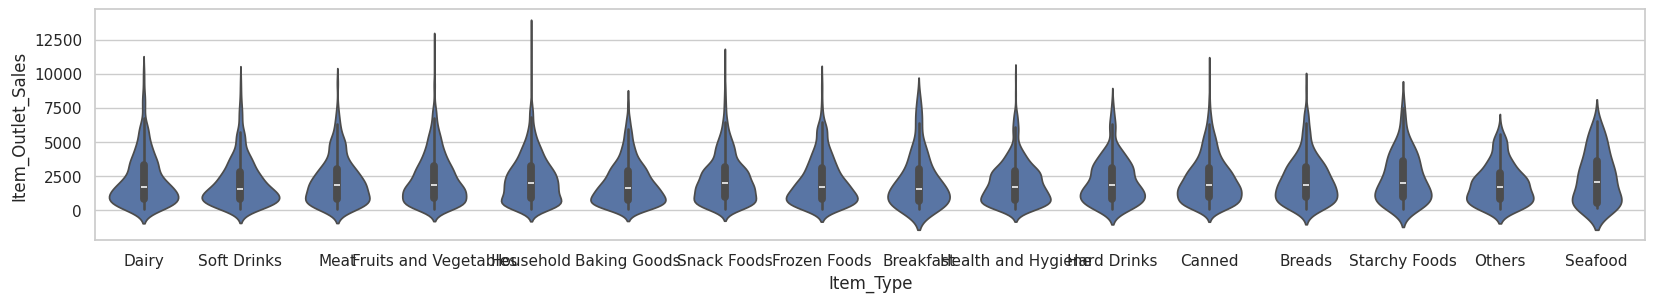

In [ ]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Item_Type", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

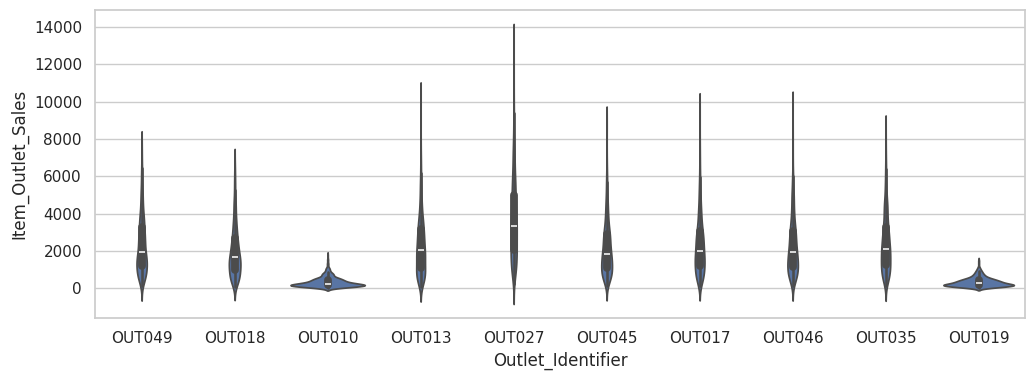

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Identifier", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

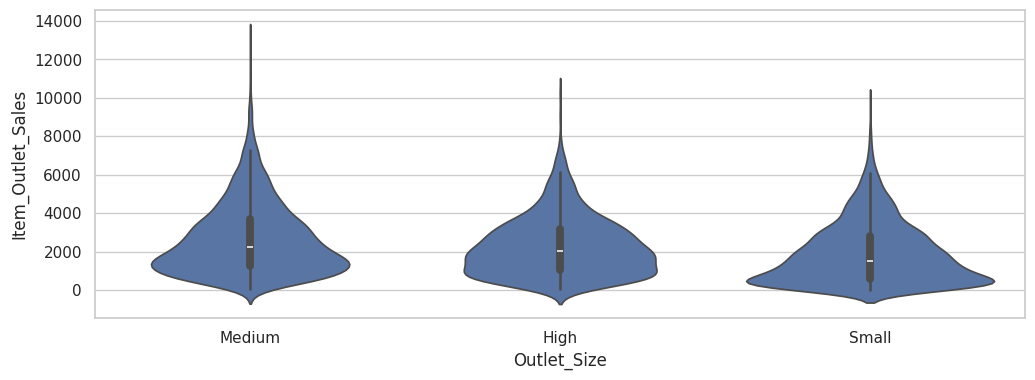

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Size", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

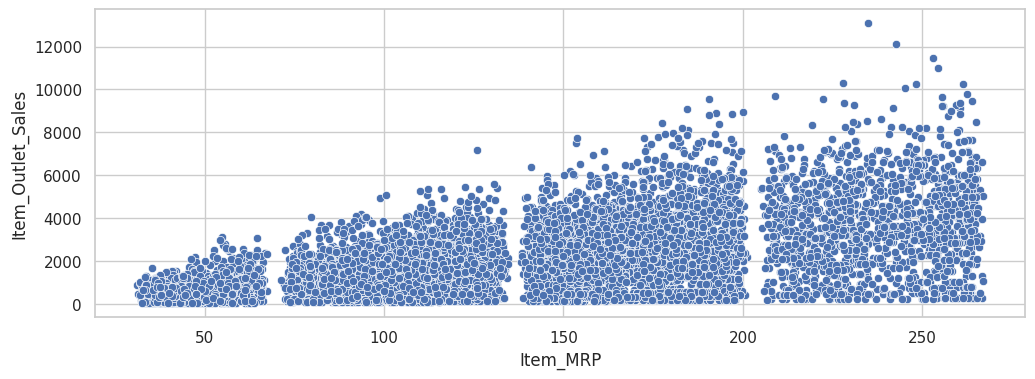

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_MRP", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

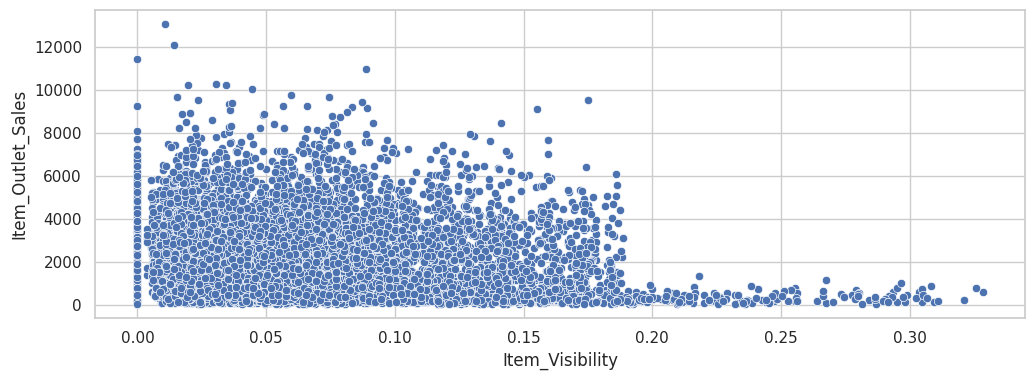

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Visibility", y ="Item_Outlet_Sales",data = train)

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

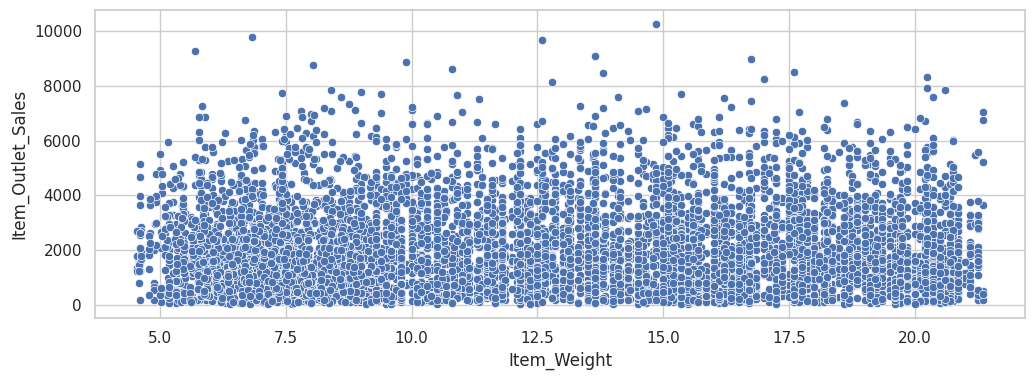

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Weight", y ="Item_Outlet_Sales",data = train)

In [ ]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
train['Item_Visibility'] =  np.where(train['Item_Visibility'] == 0,"NaN",train['Item_Visibility']).astype(float)
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
train['running'] = 2013 - train['Outlet_Establishment_Year']
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT010',"Small",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT017',"Medium",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT045',"Medium",train['Outlet_Size'])
train['Item_MRP2'] =  np.where(train['Item_MRP'] <69,"A",np.where(train['Item_MRP'] <136,"B",np.where(train['Item_MRP'] <203,"C","D")))



test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Visibility'] =  np.where(test['Item_Visibility'] == 0,"NaN",test['Item_Visibility']).astype(float)
test['Item_Identifier'] = test['Item_Identifier']
test['running'] = 2013 - test['Outlet_Establishment_Year']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT010',"Small",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT017',"Medium",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT045',"Medium",test['Outlet_Size'])
test['Item_MRP2'] =  np.where(test['Item_MRP'] <69,"A",
                              np.where(test['Item_MRP'] <136,"B",
                                       np.where(test['Item_MRP'] <203,"C","D")))

# Define training and target data
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1)

train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)

# Columns to be used for predictions
feature_cols = x_train.columns
categorical_features = np.where(x_train.dtypes == object)[0]
x_train1 = pd.get_dummies(x_train, drop_first=True)
test1 = pd.get_dummies(test[feature_cols], drop_first=True)
missing_cols = set(x_train1.columns) - set(test1.columns)
for col in missing_cols:
    test1[col] = 0
test1 = test1[x_train1.columns]

<ipython-input-102-3194a1d2c464>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
<ipython-input-102-3194a1d2c464>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})


In [ ]:
# Linear Regression Model
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train1)
test_imputed = imputer.transform(test1)
linear_model = LinearRegression()
linear_model.fit(x_train_imputed, y_train)
linear_preds = linear_model.predict(test_imputed)
ss['Item_Outlet_Sales'] = linear_preds
ss.to_csv('BigMart_LinearRegression.csv', index=False)

In [ ]:
# Random Forest Model
rf_params = {
    'n_estimators': 500,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'bootstrap': True,
    'random_state': 42
}

In [ ]:
rf_model = RandomForestRegressor(**rf_params)
rf_model.fit(x_train1, y_train)
rf_preds = rf_model.predict(test1)
ss['Item_Outlet_Sales'] = rf_preds
ss.to_csv('BigMart_RandomForest.csv', index=False)

In [ ]:
#GradientBoostingModel
gb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'subsample': 0.8,
    'random_state': 42
}

gb_model = GradientBoostingRegressor(**gb_params)
gb_model.fit(x_train_imputed, y_train)
gb_preds = gb_model.predict(test_imputed)
ss['Item_Outlet_Sales'] = gb_preds
ss.to_csv('BigMart_GradientBoosting.csv', index=False)

In [ ]:
# XGBoost Model
xgb_params = {
    'n_estimators': 2000,
    'learning_rate': 0.005,
    'max_depth': 10,
    'subsample': 0.85,
    'colsample_bytree': 0.9,
    'reg_alpha': 0.05,
    'reg_lambda': 1.0,
    'random_state': 42,
    'min_child_weight': 1,
    'gamma': 0.1,
    'scale_pos_weight': 1,
    'early_stopping_rounds': 100,
    'tree_method': 'hist',
    'booster': 'gbtree',
}
xgb_model = XGBRegressor(**xgb_params)
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    x_train1, y_train, test_size=0.2, random_state=42
)
xgb_model.fit(
    X_train_xgb,
    y_train_xgb,
    eval_set=[(X_val_xgb, y_val_xgb)],
    verbose=False
)

xgb_preds = xgb_model.predict(test1)
ss['Item_Outlet_Sales'] = xgb_preds
ss.to_csv('BigMart_XGBoost.csv', index=False)

In [ ]:
#CatBoost
catboost_params = {
    'loss_function': 'RMSE',
    'learning_rate': 0.01,
    'max_depth': 8,
    'n_estimators': 1000,
    'l2_leaf_reg': 3,
    'subsample': 0.8,
    'random_state': 42
}
catboost_model = CatBoostRegressor(**catboost_params, cat_features=categorical_features)
catboost_model.fit(x_train, y_train)
catboost_preds = catboost_model.predict(test[feature_cols])
ss['Item_Outlet_Sales'] = catboost_preds
ss.to_csv('BigMart_CatBoost.csv', index=False)

In [ ]:
catboost_params = {
'l2_leaf_reg': 0.001061926,'max_bin': 322,
 'learning_rate': 0.010814672,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 160,
              'loss_function': 'RMSE','n_estimators':  1000
}
catboost_model = CatBoostRegressor(**catboost_params, cat_features=categorical_features)
catboost_model.fit(x_train, y_train)
catboost_preds = catboost_model.predict(test[feature_cols])
ss['Item_Outlet_Sales'] = catboost_preds
ss.to_csv('BigMart_CatBoost.csv', index=False)

0:	learn: 1696.3495322	total: 67.5ms	remaining: 1m 7s
1:	learn: 1686.0104431	total: 119ms	remaining: 59.4s
2:	learn: 1675.3007001	total: 177ms	remaining: 58.7s
3:	learn: 1665.4466403	total: 233ms	remaining: 58s
4:	learn: 1655.3050814	total: 336ms	remaining: 1m 6s
5:	learn: 1645.1938340	total: 408ms	remaining: 1m 7s
6:	learn: 1635.4057642	total: 482ms	remaining: 1m 8s
7:	learn: 1625.5812900	total: 537ms	remaining: 1m 6s
8:	learn: 1616.0614302	total: 613ms	remaining: 1m 7s
9:	learn: 1606.5705994	total: 678ms	remaining: 1m 7s
10:	learn: 1597.2392603	total: 709ms	remaining: 1m 3s
11:	learn: 1588.0128361	total: 791ms	remaining: 1m 5s
12:	learn: 1578.9884077	total: 838ms	remaining: 1m 3s
13:	learn: 1570.2364849	total: 867ms	remaining: 1m 1s
14:	learn: 1561.6133445	total: 920ms	remaining: 1m
15:	learn: 1553.0950788	total: 964ms	remaining: 59.3s
16:	learn: 1544.5241831	total: 1.02s	remaining: 59s
17:	learn: 1536.6573111	total: 1.04s	remaining: 57s
18:	learn: 1528.5169425	total: 1.06s	remaining